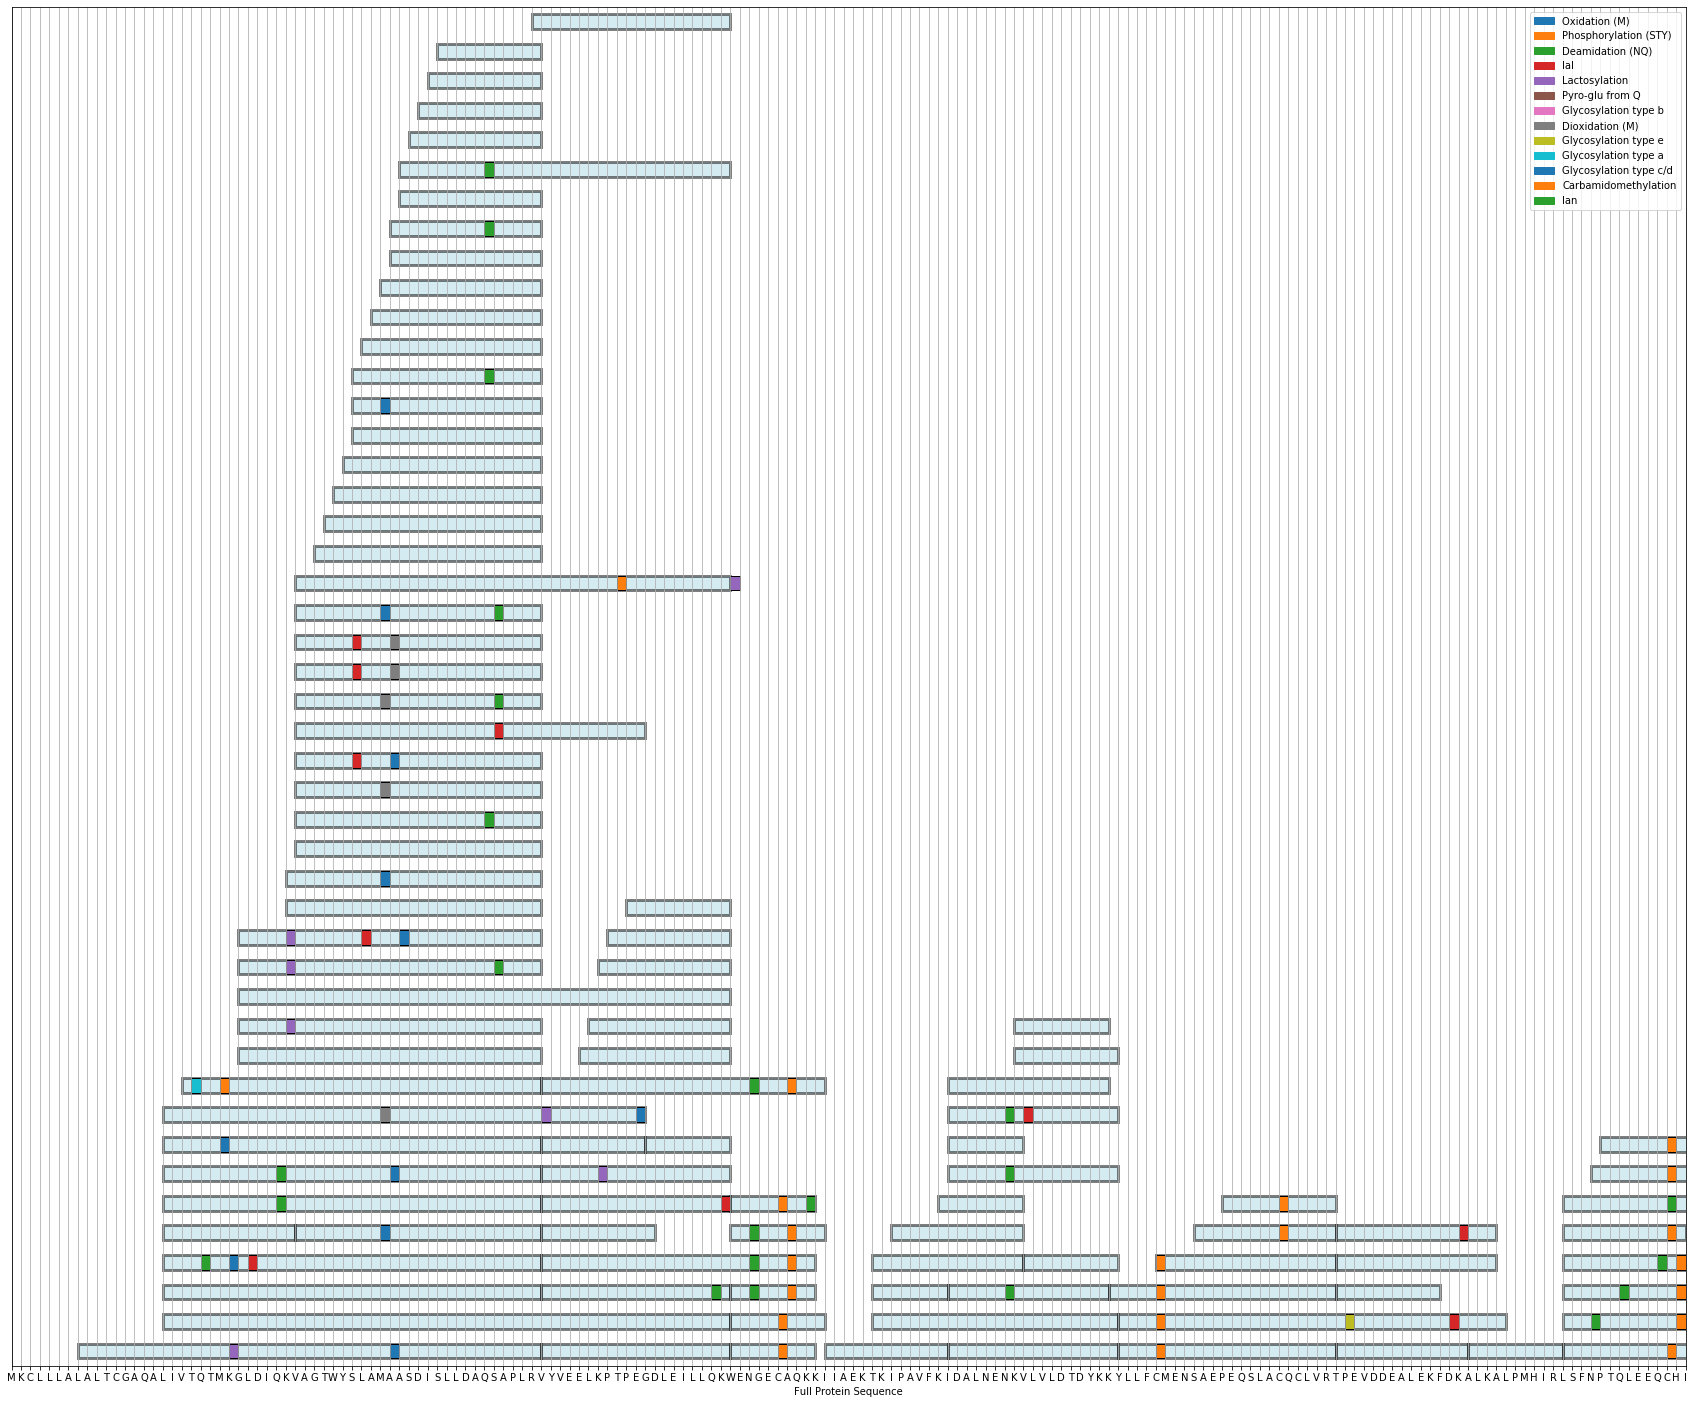

In [7]:
from utils import get_data_and_remove_unwanted_columns, sanitize_data, preprocess_data_for_peptide_segment_plot, get_peptide_segments_and_modifications, plot_peptide_segments, normalize_intensities_by_protein_intensity, split_data_in_samples, get_protein_sequence
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

_protein = "P02754"
df = get_data_and_remove_unwanted_columns()
df = sanitize_data(df)

data = preprocess_data_for_peptide_segment_plot(df, _protein, size=100)
rectatngles, modifications, height = get_peptide_segments_and_modifications(data, 0.5, _protein)
plot_peptide_segments(rectatngles, modifications, height, _protein)

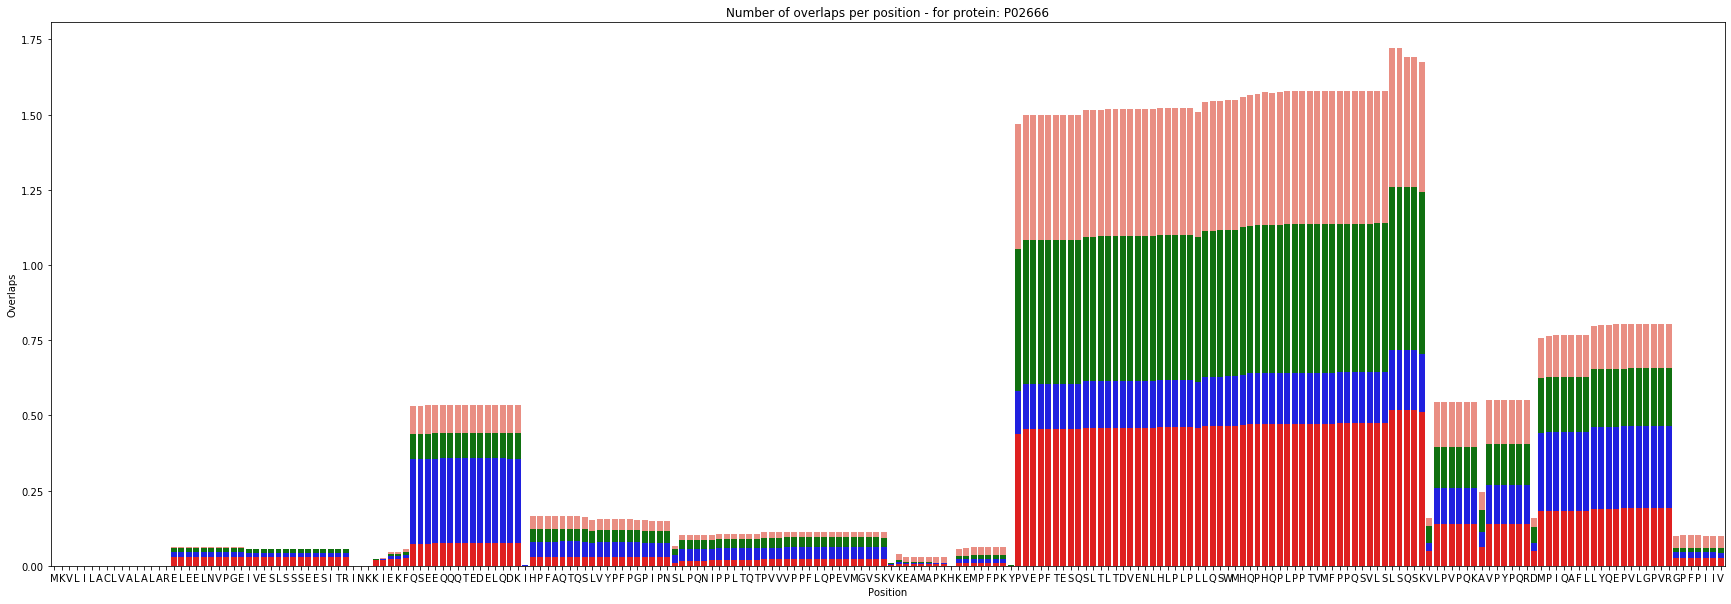

In [53]:
import math

normalized_dfs = normalize_intensities_by_protein_intensity(df)
first = normalized_dfs[0]

def colors_from_values(values, palette_name):
    indices = np.round(values * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

def plot_overlap_barchart_by_intensity_and_sample(df, selected_protein= "P02666"):
    df_new = df[df["Protein Accession"] == selected_protein]
    seq_list = list(get_protein_sequence(selected_protein))
    _len = len(seq_list)
    overlaps_list_1 = [0]*_len
    overlaps_list_2 = [0]*_len
    overlaps_list_3 = [0]*_len
    overlaps_list_4 = [0]*_len

    # add intensity into all positions where there is an overlap
    for i in range(len(df_new)):
        row = df_new.iloc[i]
        for j in range(row['Start'], row['End']):
            if not pd.isnull(row["Area Sample 1"]):
                overlaps_list_1[j] += row['Area Sample 1']
            if not pd.isnull(row["Area Sample 2"]):
                overlaps_list_2[j] += row['Area Sample 2']
            if not pd.isnull(row["Area Sample 3"]):
                overlaps_list_3[j] += row['Area Sample 3']            
            if not pd.isnull(row["Area Sample 4"]):
                overlaps_list_4[j] += row['Area Sample 4']

    overlaps_list_2 = np.add(overlaps_list_1, overlaps_list_2)
    overlaps_list_3 = np.add(overlaps_list_2, overlaps_list_3)
    overlaps_list_4 = np.add(overlaps_list_3, overlaps_list_4)

    df_overlaps1 = pd.DataFrame(list(zip(range(_len), overlaps_list_1)), columns=['Position', 'Overlaps'])
    df_overlaps2 = pd.DataFrame(list(zip(range(_len), overlaps_list_2)), columns=['Position', 'Overlaps'])
    df_overlaps3 = pd.DataFrame(list(zip(range(_len), overlaps_list_3)), columns=['Position', 'Overlaps'])
    df_overlaps4 = pd.DataFrame(list(zip(range(_len), overlaps_list_4)), columns=['Position', 'Overlaps'])

    plt.figure(figsize=(30,10))

    bar4 = sns.barplot(x="Position", y= "Overlaps", data= df_overlaps4, color='salmon')
    bar3 = sns.barplot(x="Position", y= "Overlaps", data= df_overlaps3, color='green')
    bar2 = sns.barplot(x="Position", y= "Overlaps", data= df_overlaps2, color='blue')
    bar1 = sns.barplot(x="Position", y= "Overlaps", data= df_overlaps1, color='red')


    bar1.set_xticklabels(seq_list)
    bar1.set_title(f"Number of overlaps per position - for protein: {selected_protein}")
    plt.show()    

plot_overlap_barchart_by_intensity_and_sample(first)

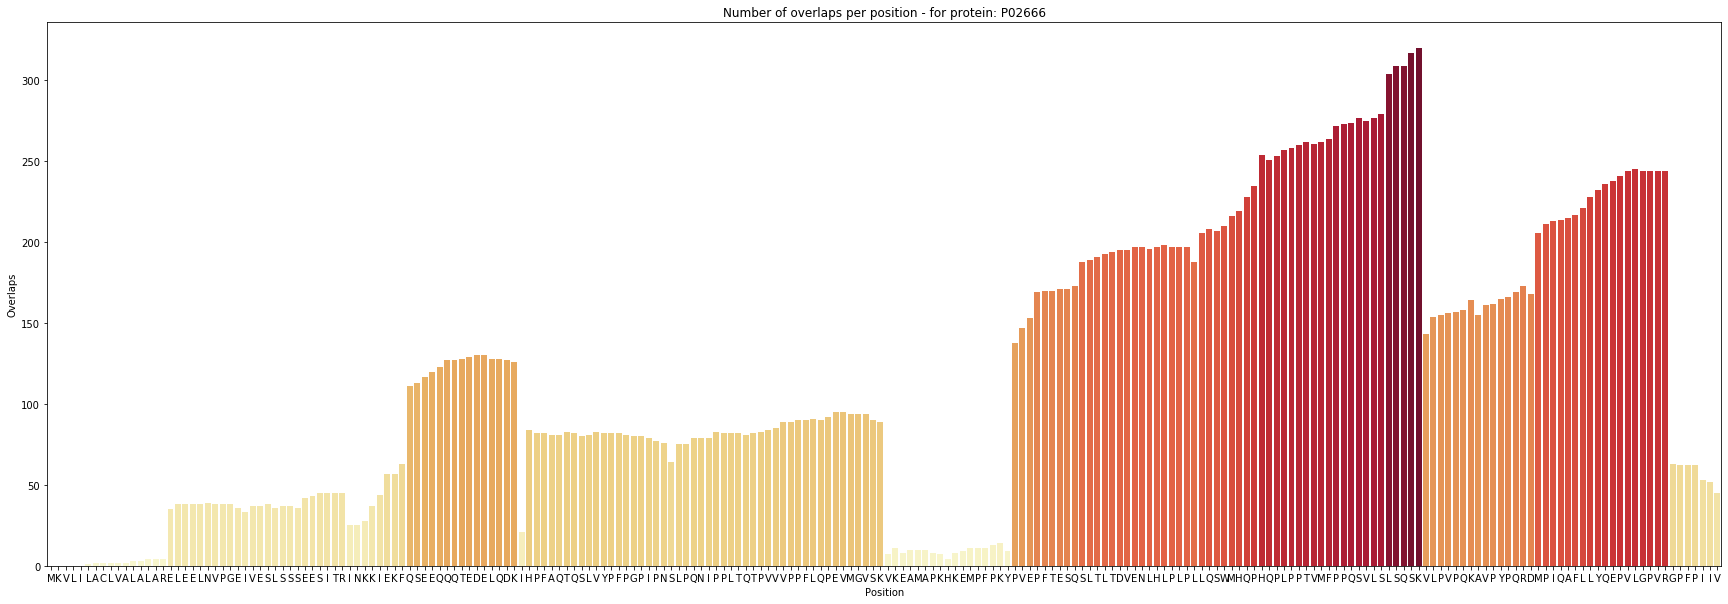

In [38]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

# make barchart with density of overlaps
# blot overlapping inttervals

# df where protein accession is P02666
df = get_data_and_remove_unwanted_columns()
df = sanitize_data(df)
def plot_overlap_barchart2(df, selected_protein= "P02666"):
    df_new = df[df["Protein Accession"] == selected_protein]
    seq_list = list(get_protein_sequence(selected_protein))
    _len = len(seq_list)
    num_overlpas_list = [0]*_len # init as zeroes
    # add 1 into all positions where there is an overlap
    for i in range(len(df_new)):
        for j in range(df_new.iloc[i]['Start'], df_new.iloc[i]['End']):
            num_overlpas_list[j] += 1
    df_overlaps = pd.DataFrame(list(zip(range(_len), num_overlpas_list)), columns=['Position', 'Overlaps'])
    plt.figure(figsize=(30,10))
    g= sns.barplot(x="Position", y= "Overlaps", data= df_overlaps, palette=colors_from_values(np.asarray(num_overlpas_list), "YlOrRd"))
    g.set_xticklabels(seq_list)
    g.set_title(f"Number of overlaps per position - for protein: {selected_protein}")
    return g  

plot_overlap_barchart2(df)